# Project Python Foundations: FoodHub Data Analysis

**Name:** Ben McGahee

**Date:** 5/12/2024

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Import drive from Google Colab and mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read in the FoodHub data from the Google Drive
data = pd.read_csv('/content/drive/MyDrive/Data/foodhub_order.csv')

#Make dataframe df a copy of data so it does not affect the original version
df = data.copy()

In [ ]:
# Use head function to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Explore the Dataset**

In [ ]:
#Use shape attribute to find number of rows and columns in the dataframe
df.shape

(1898, 9)

#### **Observations:** There are 1,898 rows and 9 columns in the dataset.


### **Data Types of Columns**

In [ ]:
#The info function shows the columns, non-null value count for each column, and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:** Below are the datatypes for each column in the dataset.
* order_id - 64 bit integer
* customer_id - 64 bit integer
* restaurant_name - object
* cuisine_type - object
* cost_of_the_order - 64 bit float
* day_of_the_week - object
* rating - object
* food_preparation_time - 64 bit integer
* delivery_time - 64 bit integer

 All of these columns have 1,898 non-null values


### **Check For Missing Values**

In [ ]:
# Use isnull and sum functions to find total number of missing values for each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### **Observations:** There are no missing values in the data.

* The rating column has an object data type and a "Not given" value for unrated orders.
* There is no need to treat the rating column with any imputation techniques since null values are not present


### **Check Statistical Summary**

In [ ]:
#Use describe function to show descriptive transaction
#T is the transpose of the dataframe to interchange rows and columns for readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### **Observations:**

* Minimum Food Preparation Time - 20 minutes
* Average Food Preparation Time - 27.37 minutes (~27 minutes, 22 seconds)
* Maximum Food Preparation Time - 35 minutes


### **Find number of unrated orders**

In [ ]:
#Use value counts on rating column to find number of orders without a rating
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### **Observations:**
* 736 orders are not rated
* Unrated orders account for almost 39% of the data


### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Order ID

There are 1,898 order IDs.

In [ ]:
#Get the number of unique orders using nunique function
df['order_id'].nunique()

1898

#### Customer ID

1,200 customers used the app to order food.

In [ ]:
#Get the number of unique customers using nunique function
df['customer_id'].nunique()

1200

#### Restaurant Name

178 restaurants are listed in the data.

In [ ]:
#Get the number of restaurants using nunique function
df['restaurant_name'].nunique()

178

#### Cuisine Type

There are 14 different types of cuisine.

In [ ]:
#Get the number of cuisine types using nunique function
df['cuisine_type'].nunique()

14

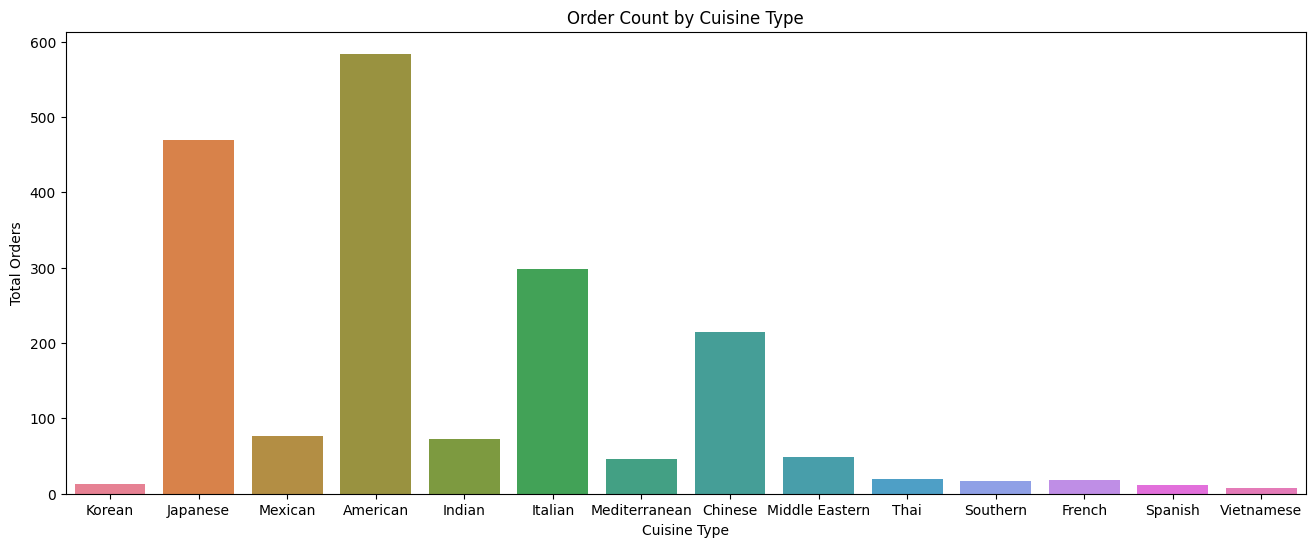

In [ ]:
#Check how many orders were made for each cuisine type

#Create a count plot
plt.figure(figsize=(16,6))
sns.countplot(data=df, x='cuisine_type', hue='cuisine_type')

#Create labels for x and y axes
plt.xlabel('Cuisine Type')
plt.ylabel('Total Orders')

#Create a title for the count plot
plt.title('Order Count by Cuisine Type')

plt.show()

#### **Observations:**

* Most popular cuisine types: American, Japanese, Italian, and Chinese.
* Least popular cuisine types: French, Southern, Korean, Spanish, Thai, and Vietnamese.
* There are pairs of cuisine types that are similar in popularity
  * Mexican and Indian
  * Mediterranean and Middle Eastern
  * Thai and French
  * Korean and Spanish

####Order Cost

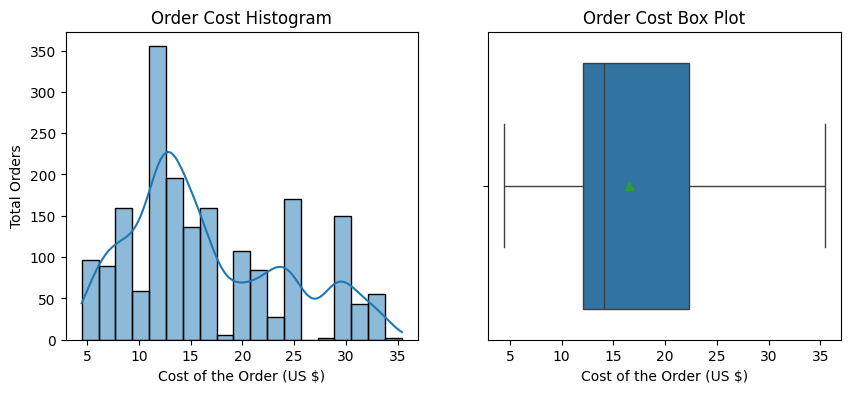

In [ ]:
#Plot a histogram to see distribution of order cost
plt.figure(figsize=(10,4))

#Generate histogram on the left side
plt.subplot(1,2,1)
sns.histplot(data=df, x='cost_of_the_order', kde=True)

#Create labels for x and y axes
plt.xlabel('Cost of the Order (US $)')
plt.ylabel('Total Orders')

#Create a title for the histogram
plt.title('Order Cost Histogram')

#Create a box plot on right side to see a statistical summary of order cost
plt.subplot(1,2,2)
sns.boxplot(data=df, x='cost_of_the_order', showmeans=True)

#Create label for x axis and title for box plot
plt.xlabel('Cost of the Order (US $)')
plt.title('Order Cost Box Plot')

plt.show()

In [ ]:
#Check the mean and median order costs
df['cost_of_the_order'].mean(), df['cost_of_the_order'].median()

(16.498851422550054, 14.14)

#### **Observations:**
* The graphs show that the distribution of order cost is skewed to the right for a couple of reasons:
  * KDE plot indicates most of the orders have a lower cost in the \$10 to \$15 range
  * Box plot shows the mean of about \$16.50 is greater than the median of $14.14

####Day of the Week

Day of the Week falls into two categories:

1. Weekend - Saturday and Sunday
2. Weekday - Monday through Friday

In [ ]:
#Find unique values for day of the week
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

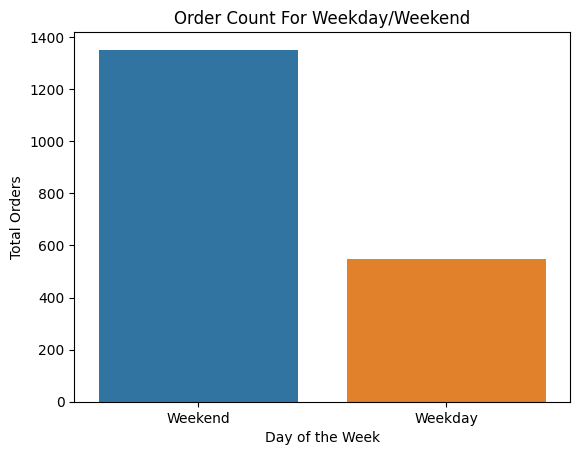

In [ ]:
#Create a count plot to see how many orders were placed during the week and on the weekend
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week')

#Create labels for x and y axes
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')

#Create a title for count plot
plt.title('Order Count For Weekday/Weekend')

plt.show()

In [ ]:
#Find total number of orders for the week and weekend
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

####**Observations:**
* The number of weekend orders is over twice the number of weekday orders
  *  Over 71% of the orders take place on the weekend
  * Approximately 29% of the orders take place during the week

#### Rating

Possible ratings given by customers were 3, 4, 5, or Not given.

In [ ]:
#Get the unique values for rating
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

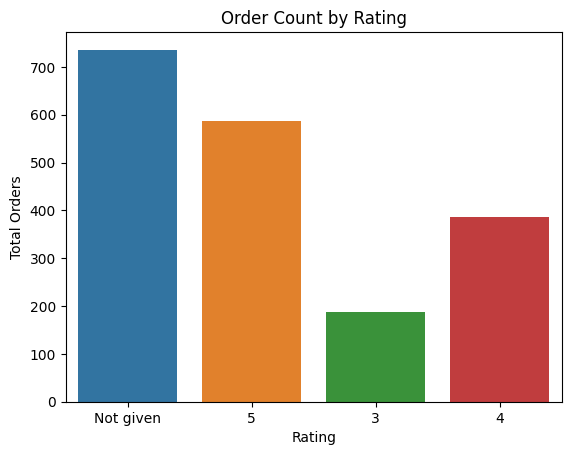

In [ ]:
#Create a count plot to see how many orders exist for each rating
sns.countplot(data=df, x='rating', hue='rating')

#Create labels for x and y axes
plt.xlabel('Rating')
plt.ylabel('Total Orders')

#Create a title for count plot
plt.title('Order Count by Rating')

plt.show()

In [ ]:
#Get number of orders that were rated and unrated
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### **Observations:**

* Orders that were rated by customers in the data are either 3, 4, or 5
* Majority of the orders are either not rated or have a rating of 5
* The combined total of 3 and 4 rated orders is slightly less than the number of 5 rated orders
* On a postive note:
  * No orders had a very low rating of either 1 or 2
  * Over 51% of the orders were highly rated with a 4 or 5

####Food Preparation Time

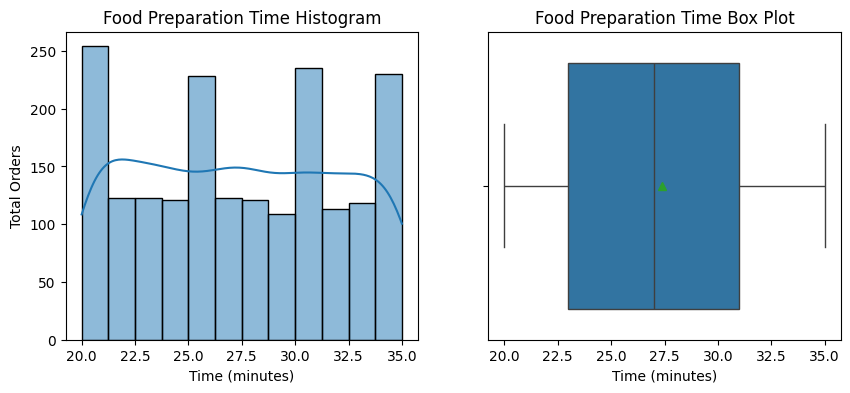

In [ ]:
#Create figure and set figure size
plt.figure(figsize=(10,4))

#Create histogram plot on the left side
plt.subplot(1,2,1)
sns.histplot(data=df, x='food_preparation_time', kde=True)

#Create labels for x and y axes
plt.xlabel('Time (minutes)')
plt.ylabel('Total Orders')

#Create title for histogram
plt.title('Food Preparation Time Histogram')

#Create box plot of food preparation time on the right side
plt.subplot(1,2,2)
sns.boxplot(data=df, x='food_preparation_time', showmeans=True)

#Create label for x axis and title for box plot
plt.xlabel('Time (minutes)')
plt.title('Food Preparation Time Box Plot')

plt.show()

In [ ]:
#Check mean and median of Food Preparation Time
df['food_preparation_time'].mean(), df['food_preparation_time'].median()

(27.371970495258168, 27.0)

In [ ]:
#Check value counts for Food Preparation Time
df['food_preparation_time'].value_counts().head(10)

food_preparation_time
21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
Name: count, dtype: int64

In [ ]:
#Find the mode of food preparation time
df['food_preparation_time'].mode()

0    21
Name: food_preparation_time, dtype: int64

#### **Observations:**
* Food prep time of 21 minutes is the mode with 135 orders
* The mean food prep time of 27.37 minutes is slightly greater than the median food prep time of 27 minutes
* Based on these values, we can say food prep time is slightly right skewed
* It is good to see that most of the orders take less than the average preparation time
* The question is will food preparation time have any effect on the rating?

####Delivery Time

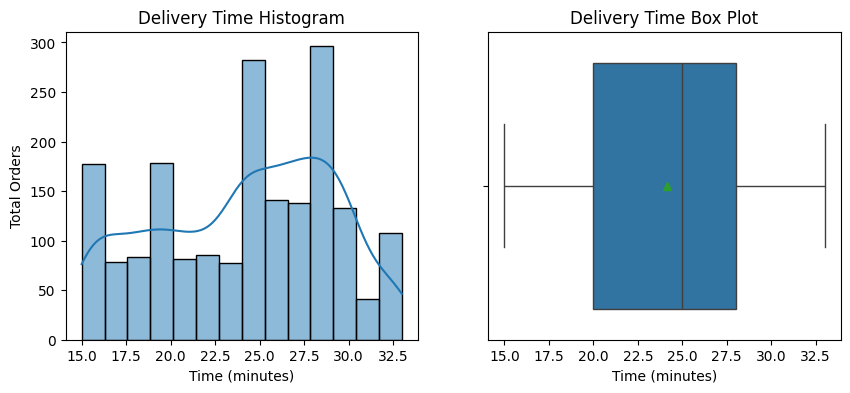

In [ ]:

#Create figure and set figure size
plt.figure(figsize=(10,4))

#Plot histogram of delivery time on the left side
plt.subplot(1,2,1)
sns.histplot(data=df, x='delivery_time', kde=True)

#Create labels for x and y axes
plt.xlabel('Time (minutes)')
plt.ylabel('Total Orders')

#Create title for histogram
plt.title('Delivery Time Histogram')

#Create box plot of delivery time on the right side
plt.subplot(1,2,2)
sns.boxplot(data=df, x='delivery_time', showmeans=True)

#Create label for x axis and title for box plot
plt.xlabel('Time (minutes)')
plt.title('Delivery Time Box Plot')

plt.show()

In [ ]:
#Get the number of orders for each delivery time
df['delivery_time'].value_counts()

delivery_time
24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: count, dtype: int64

In [ ]:
#Check mean and median delivery times
df['delivery_time'].mean(), df['delivery_time'].median()

(24.161749209694417, 25.0)

#### **Observations:**
* The delivery time distribution is skewed to the left for a couple of reasons:
  * Histogram/KDE plot show that most of the orders have a longer delivery time of around 28-29 minutes
  * The mode delivery time is 24 minutes with 162 orders
  * The mean delivery time of 24.16 minutes is less than the median delivery time of 25 minutes
* It will be interesting to see if the longer delivery times have any effect on the customer ratings

### **Top 5 Restaurants - Most Orders**

In [ ]:
#Use value_counts function and head function to get top 5 restaurants
df['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### **Observations:** The top 5 restaurants that received the most orders were:

1. Shake Shack - 219 orders
2. The Meatball Shop - 132 orders
3. Blue Ribbon Sushi - 119 orders
4. Blue Ribbon Fried Chicken - 96 orders
5. Parm - 68 orders


### **Most Popular Cuisine Type**

In [ ]:
#Filter dataframe to get the weekend orders and view the cuisine type with value_counts function
#Only read the first record to get the most popular cuisine type on weekends
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### **Observations:**
* American is the most popular cuisine on weekends pulling in 415 orders
* This is not too surprising since American is the most popular cuisine type


### **Percentage of Orders > \$20**

In [ ]:
#Use len function to get total orders in the dataset
total_orders = len(df)

#Find length of filtered dataframe for orders over $20
orders_over_20_dollars = len(df[df['cost_of_the_order'] > 20.00])

# Get percent of orders over $20 by dividing number of orders over $20 by number of orders times 100
percentage_over_20_dollars = orders_over_20_dollars / total_orders * 100

print(percentage_over_20_dollars)

29.24130663856691


#### **Observations:** Approximately 29.24% of the orders cost more than $20


### **Mean Order Delivery Time**

In [ ]:
#Use mean function to get mean order delivery time
df['delivery_time'].mean()

24.161749209694417

#### **Observations:** Mean order delivery time is about 24.16 minutes (~24 minutes, 10 seconds)


### **Get Top 3 Customers - Most Orders (Get 20% Discount)**

In [ ]:
#Use value_counts function and head function to find top 3 most frequent customers.
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### **Observations:** Below are the IDs of the three customers who made the most orders.

* 52832 - 13 orders
* 47440 - 10 orders
* 83287 - 9 orders


####Get a break down of the orders for each customer

In [ ]:
#Customer ID: 52832
df[df['customer_id']==52832]['cuisine_type'].value_counts()

cuisine_type
Japanese          3
Chinese           2
Middle Eastern    2
Indian            2
American          1
Mexican           1
Korean            1
French            1
Name: count, dtype: int64

In [ ]:
#Customer ID: 47440
df[df['customer_id']==47440]['cuisine_type'].value_counts()

cuisine_type
American    10
Name: count, dtype: int64

In [ ]:
#Customer ID: 83287
df[df['customer_id']==83287]['cuisine_type'].value_counts()

cuisine_type
American    4
Japanese    4
Spanish     1
Name: count, dtype: int64

* All of the orders for 47440 come from American restaurants
* Most of the orders for 83287 come from American and Japanese restaurants
* The majority of the orders for 52832 come from Japanese, Chinese, Middle Eastern and Indian restaurants

### Multivariate Analysis

####Cuisine Type vs. Cost of the Order

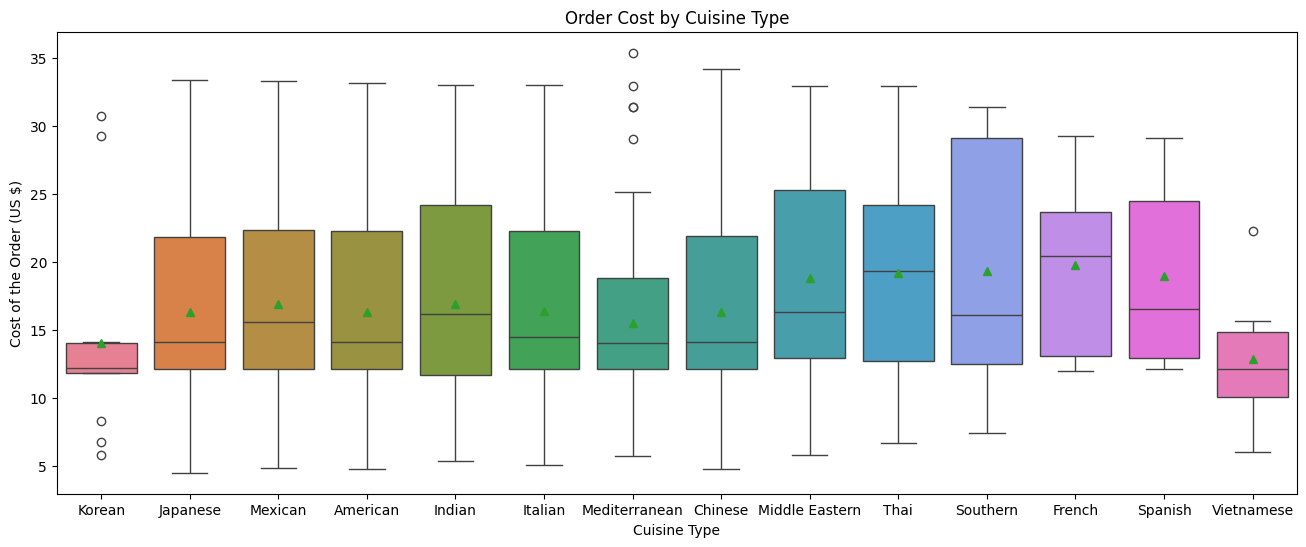

In [ ]:
#Create figure and set figure size
plt.figure(figsize=(16,6))

#Create box plot with Cuisine Type on the x-axis and Cost of the Order on the y-axis
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', showmeans=True)

#Create labels for x and y axes
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order (US $)')

#Create title for box plot
plt.title('Order Cost by Cuisine Type')

plt.show()

#### **Observations:**

* American, Japanese, Italian, and Chinese have similar mean/median prices around \$15 to \$20 range
* Cuisines with lesser orders tend to have a higher mean or median prices than cuisines with most orders
* Outliers exist in Korean, Mediterranean, and Vietnamese cuisines

####Cuisine Type vs. Food Preparation Time

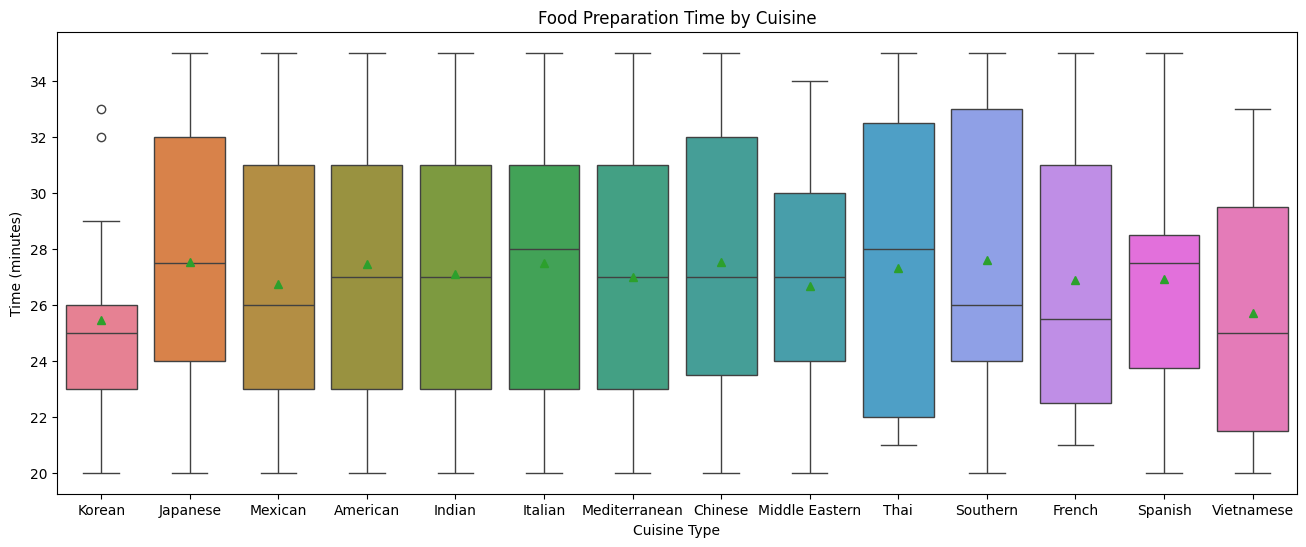

In [ ]:

#Create figure and set figure size
plt.figure(figsize=(16,6))

#Create box plot with Cuisine Type on the x-axis and Food Preparation Time on the y-axis
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue='cuisine_type', showmeans=True)

#Create labels for x and y axis
plt.xlabel('Cuisine Type')
plt.ylabel('Time (minutes)')

#Create title for box plot
plt.title('Food Preparation Time by Cuisine')

plt.show()

#### **Observations**:

* The mean/median food preparation time for all cuisine types range between 25 to 28 minutes
* American and Indian cuisines have a similar distribution in food preparation time
* Most cuisines have a minimum prep time of 20 minutes and a maximum prep time of over 34 minutes
* Korean has a couple of outliers with food taking around 32-33 minutes to prepare

####Day of the Week vs. Delivery Time

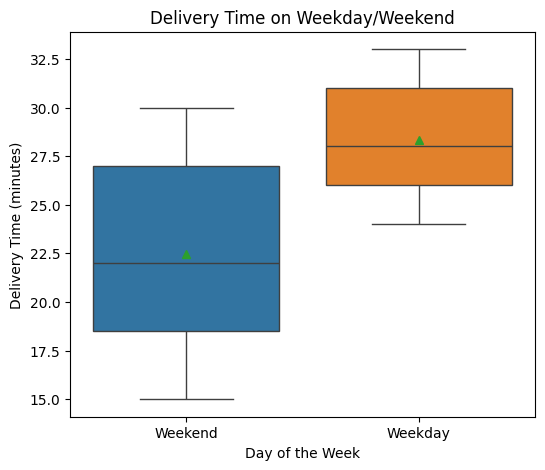

In [ ]:

#Create figure and set figure size
plt.figure(figsize=(6,5))

#Create box plot with Day of the Week on the x-axis and Delivery Time on the y-axis
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', showmeans=True)

#Create labels for x and y axes
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')

#Create title for box plot
plt.title('Delivery Time on Weekday/Weekend')

plt.show()

#### **Observations:**

* Mean/Median delivery time on the weekend is about 5 minutes shorter than the weekday delivery time
* Over half of the orders on the weekend took less time to deliver than the weekday minimum delivery time
* There is a higher variance and range of delivery times on the weekend than during the week
* Orders can take longer to deliver on the weekdays than weekends since traffic is usually busier during this time

####Rating vs. Cost of the Order

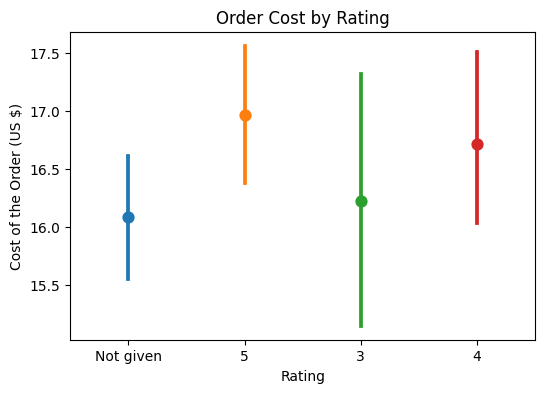

In [ ]:
#Create figure and set figure size.
plt.figure(figsize=(6,4))

#Create point plot with Rating on the x-axis and Cost of the Order on the y-axis
sns.pointplot(data=df, x='rating', y='cost_of_the_order', hue='rating')

#Create labels for x and y axes
plt.xlabel('Rating')
plt.ylabel('Cost of the Order (US $)')

#Create title for point plot
plt.title('Order Cost by Rating')

plt.show()

#### **Observations:**

* A rating of 5 has the largest average order cost of about \$17
* Unrated orders have an average cost over \$16
* Lowest rating of 3 has average cost of about \$16.25 with a large variation of order costs ranging from around \$15.10 to about $17.40

####Rating vs. Food Preparation

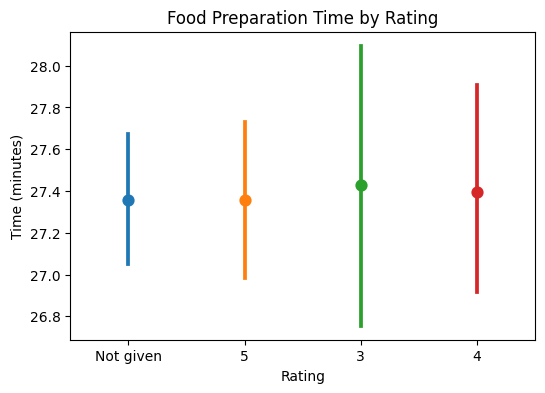

In [ ]:
#Create figure and set figure size
plt.figure(figsize=(6,4))

#Create point plot with Rating on the x-axis and Food Preparation Time on the y-axis
sns.pointplot(data=df, x='rating', y='food_preparation_time', hue='rating')

#Create labels for x and y axes
plt.xlabel('Rating')
plt.ylabel('Time (minutes)')

#Create title for point plot
plt.title('Food Preparation Time by Rating')

plt.show()

#### **Observations:**

* Orders with a rating of 5 have the lowest average food preparation time of over 27.3 minutes
* Rated 3 orders have the highest average food preparation time close to 27.5 minutes
* Also, orders with a rating of 3 have the largest variations of prep time between 26.7 minutes to 28.1 minutes
* Orders with ratings of 4 and 5 both have lower average prep times than rated 3 orders
* Customers tend to give lower ratings for orders taking longer than the average food prep time

####Correlation Matrix
Variables - Cost of the Order, Delivery Time, and Food Preparation Time

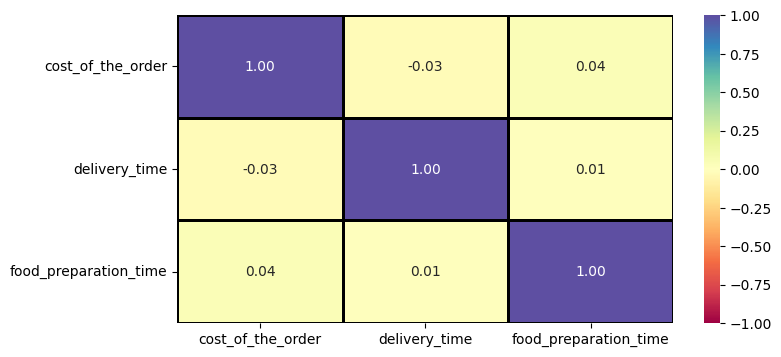

In [ ]:
#Create figure and set figure size
plt.figure(figsize=(8,4))

#Create heatmap to show correlation matrix of the three variables
sns.heatmap(df[['cost_of_the_order', 'delivery_time', 'food_preparation_time']].corr(), annot=True, cmap='Spectral', linewidths=1, linecolor='black', vmin=-1, vmax=1, fmt='.2f')

plt.show()

#### **Observations:**

* Positive correlated variables:
  * Order Cost and Food Prep Time: 0.04 (strongest correlation)
  * Food Prep Time and Delivery Time: 0.01  (weakest correlation)
* Negative correlated variables:
  * Order Cost and Delivery Time: -0.03

* Overall, we do not see any strong correlations between any pair of the three variables
* It is reasonable to see Cost of the Order and Food Preparation have a positive correlation
  * More expensive orders take longer time to prepare the food
  * Customers understand this and believe a high quality meal is worth the wait
* It is interesting to see the negative correlation between order cost and food delivery time
  * Most people would think cheaper meals take less time to deliver than expensive meals
  * Factors such as busy traffic or adverse weather conditions can negatively affect the delivery time

####Find the total revenue generated by each restaurant

In [ ]:
#Check the total revenue generated by the top 25 restaurants

#Use groupby on with a category of restaurant_name and column cost_of_the_order and find the sum of all order costs for each restaurant
#Display the top 25 restaurants in descending order using sort_values function
df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head(25)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Sush

In [ ]:
#View all the restaurants top to bottom for the total revenue in descending order
df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False)

restaurant_name
Shake Shack                   3579.53
The Meatball Shop             2145.21
Blue Ribbon Sushi             1903.95
Blue Ribbon Fried Chicken     1662.29
Parm                          1112.76
                               ...   
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, Length: 178, dtype: float64

#### **Observations:**

* The top 5 restaurants that generated the highest revenue also received the most orders
* Shake Shack is an American restaurant with the highest revenue of \$3,579.53
* Westville Hudson is an American restaurant with the least revenue in the top 25 list of \$292.59
* **Note:** American cuisine has the most orders based on the count plot in the univariate analysis

### **Find Customers that meet following criteria:**
* Rating count over 50
* Average rating over 4

In [ ]:
#Filter dataframe to get orders that were given a rating
#Use a copy so original dataframe is not affected
rated = df[df['rating'] != 'Not given'].copy()

#Rating column was originally an object data type and must be converted to integer data type
rated['rating'] = rated['rating'].astype('int')

#Create dataframe to get a rating for each restaurant by using groupby with category of restaurant_name, column rating, and count function
#Use sort_values function in descending order and reset the index
rating_count = rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

#Get the names of the restaurant that have a rating count greater than 50 by filtering rating_count dataframe and access the restaurant_name column
restaurants_over_50 = rating_count[rating_count['rating'] > 50]['restaurant_name']

#Filter the dataframe for restaurants having a rating count over 50
average_rating_over_4 = rated[rated['restaurant_name'].isin(restaurants_over_50)]

#Get the average rating for these restaurants, which are listed in descending order by using groupby on category of restaurant_name, rating column
#Use sort_values function in descending order and reset index
average_rating_over_4.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### **Observations:** The four restaurants with a rating count of more than 50 also have an average rating greater than 4. Here are the restaurant names that qualify for the promotional offer:

* The Meatball Shop
* Blue Ribbon Fried Chicken
* Shake Shack
* Blue Ribbon Sushi


### **Net Revenue Calculation**

In [ ]:
#Calc Surchage function takes in order cost
#Returns the surchage based on the cost of the order
def calc_surchage(order_cost):
  if order_cost > 20:
    return order_cost * 0.25
  elif order_cost > 5:
    return order_cost * 0.15
  else:
    return order_cost * 0

#Create Revenue column and use apply function to calculate the revenue on each order
df['Revenue'] = df['cost_of_the_order'].apply(calc_surchage)

#Calculate total revenue by using the sum function
net_revenue = df['Revenue'].sum()

#Round net revenue to two decimal places
round(net_revenue, 2)

6166.3

#### **Observations:** The net revenue generated by FoodHub is $6,166.30.


### **Percentage of orders taking more than 60 minutes to deliver**

In [ ]:
#Create a new column total_order_time that represents the sum of food preparation time and delivery time
df['total_order_time'] = df['food_preparation_time'] + df['delivery_time']

#Find the total number of orders that take more than 60 minutes to get delivered from the time order is placed
deliveries_over_60_mins = len(df[df['total_order_time'] > 60])

#Get the total number of orders
total_orders = len(df)

#Find the percentage of orders taking longer than 60 minutes for delivery
percentage_over_60_mins = deliveries_over_60_mins / total_orders * 100

#Round percent to two decimal places
round(percentage_over_60_mins, 2)

10.54

#### **Observations:** About 10.54% of orders take over an hour to be delivered from the time order is placed


### **Mean Delivery Time: Weekday vs. Weekend**

In [ ]:
#Get the mean delivery time for weekdays
weekday_mean_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

#Get the mean delivery time for weekends
weekend_mean_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

#Print results
weekday_mean_time, weekend_mean_time

(28.340036563071298, 22.4700222057735)

#### **Observations:** The average delivery time during the week is a few minutes longer than the average delivery time on the weekend.

* Weekday Mean Delivery Time - 28.34 minutes (~28 minutes, 20 seconds)
* Weekend Mean Delivery Time - 22.47 minutes (~22 minutes, 28 seconds)
* Busy traffic in New York City takes place during the week
  * This can cause delays in food delivery to customers
  * More customers may prefer to order food on the weekends when there is less traffic


####Further Exploration

####**Popular Cuisine Types Restaurant Count:**

####**Restaurant Count by Cuisine Type:**

In [ ]:
#Filter dataframe to get the unique restaurants for each cuisine type - American, Japanese, and Italian
#Use the nunique function to find total number of restaurants for each cuisine type.
american_restaurant_count = df[df['cuisine_type']=='American']['restaurant_name'].nunique()
japanese_restaurant_count = df[df['cuisine_type']=='Japanese']['restaurant_name'].nunique()
italian_restaurant_count = df[df['cuisine_type']=='Italian']['restaurant_name'].nunique()

#Print the results
print(f'Number of American Restaurants: {american_restaurant_count}')
print(f'Number of Japanese Restaurants: {japanese_restaurant_count}')
print(f'Number of Italian Restaurants: {italian_restaurant_count}')

Number of American Restaurants: 41
Number of Japanese Restaurants: 29
Number of Italian Restaurants: 31


####**Popular Cuisine Types Order Count:**

####**Order Count by Popular Cuisine Type:**

In [ ]:
#Filter dataframe to get the top cuisine types - American, Japanese, and Italian
top_cuisine_types = df[(df['cuisine_type'] == 'American') | (df['cuisine_type'] == 'Japanese') | (df['cuisine_type'] == 'Italian')]

#Use groupby on cuisine_type as category column and get count of number of order ids
top_cuisine_types['cuisine_type'].value_counts()

cuisine_type
American    584
Japanese    470
Italian     298
Name: count, dtype: int64

#### **Observations:**
* Recall there are 178 restaurants listed in the dataset
* American, Japanese, Italian are the most popular cuisine types
  * 101 restaurants fall within this category
    * American - 41 restaurants
    * Japanese - 29 restaurants
    * Italian -  31 restaurants
  * 1,352 orders were delivered from these restaurants
    * American - 584 orders
    * Japanese - 470 orders
    * Italian -  298 orders

### Conclusion and Recommendations

### **Conclusions:**

The FoodHub dataset consists of 1,898 orders and 9 variables; half numeric and the other half categorical. No missing values were found in the data. 1,200 customers ordered food from 178 restaurants in New York that fall under 14 cuisine types.

*  About 56% of the restaurants listed in the FoodHub data fall under the cuisine types of American, Japanese, or Italian
* Restaurants of these cuisine types received the most orders and thus generated high revenues
* Only 4% of these restaurants have an average rating greater than 4

### **Recommendations:**

* Further Analysis - Investigate the following:
  * Look into the remaining 96% of the American, Japanese, and Italian restaurant population
    * Find out what is causing low and "Not given" ratings in relation to other variables such as:
      * Day of the Week
      * Cost of Order
      * Total Order Time = Food Preparation Time + Delivery Time
  * Check out the cost of orders that were greater than $5 for revenue purposes
     * Discover which cuisine types meet this criteria and find out:
       * Names of restaurants with the highest ratings
       * When most of the orders take place - Weekday or Weekend
* There are a couple of goals we wish to achieve in this analysis:
    
    * Ensure drivers can deliver the food to the customers in a timely manner
      * Weekdays - better delivery times will attract more customers to order during the week
      * Weekends - continue delivering on time to maintain high order count

 * Encourage more customers to order food from the best rated restaurants
    * Recommendation System - Refer people to various restaurants based on their preferences
    * Higher Revenue - Customers are willing to pay a little extra money for a great meal
      * Great food and service means customers will most likely return in the future
      * This generates repeat business for both the restaurants and FoodHub